### Explanatory Data Analysis on 2018 US flight data

In [56]:
from IPython.display import HTML

In [1]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

NameError: name 'HTML' is not defined

In [187]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
#import the data from csv
df=pd.read_csv('fd.csv')


In [156]:
#first look on rows and columns 
print (df.shape)

(2319612, 19)


In [121]:
print ("There is a total of {} flights in the dataset." .format(len(df.index)))

There is a total of 2319612 flights in the dataset.


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319612 entries, 0 to 2319611
Data columns (total 19 columns):
Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
UniqueCarrier       object
Origin              object
Dest                object
Distance            int64
Cancelled           int64
CancellationCode    object
Code                object
Description         object
iata                object
airport             object
city                object
state               object
country             object
lat                 float64
long                float64
dtypes: float64(2), int64(6), object(11)
memory usage: 336.2+ MB


The data is composed of integers, objects and floats. The memory usage is 336.2+ MB. 


In [123]:
df.head()


,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,Cancelled,CancellationCode,Code,Description,iata,airport,city,state,country,lat,long
0,2008,1,1,2,XE,EWR,MYR,550,0,NaN,XE,Expressjet Airlines Inc.,EWR,Newark Intl,Newark,NJ,USA,40.692497,-74.168661
1,2008,1,1,2,XE,AUS,ONT,1197,0,NaN,XE,Expressjet Airlines Inc.,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
2,2008,1,1,2,XE,ONT,MCI,1318,0,NaN,XE,Expressjet Airlines Inc.,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194
3,2008,1,1,2,XE,FAT,ONT,222,0,NaN,XE,Expressjet Airlines Inc.,FAT,Fresno Yosemite International,Fresno,CA,USA,36.776194,-119.718139
4,2008,1,1,2,XE,ONT,ELP,670,0,NaN,XE,Expressjet Airlines Inc.,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194


In [124]:
#is any row null?
df.isnull().any()

Year                False
Month               False
DayofMonth          False
DayOfWeek           False
UniqueCarrier       False
Origin              False
Dest                False
Distance            False
Cancelled           False
CancellationCode     True
Code                False
Description         False
iata                False
airport             False
city                 True
state                True
country             False
lat                 False
long                False
dtype: bool

The data contains Null values in the columns Cancellation Code, city and state. This is acceptable for the intended purpose so I will keep them. 

In [125]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2319612.0,2008.000000,0.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000
Month,2319612.0,6.343666,3.433463,1.000000,3.000000,6.000000,9.000000,12.000000
DayofMonth,2319612.0,15.727206,8.807478,1.000000,8.000000,16.000000,23.000000,31.000000
DayOfWeek,2319612.0,3.979993,1.997027,1.000000,2.000000,4.000000,6.000000,7.000000
Distance,2319612.0,812.030221,622.321614,11.000000,365.000000,640.000000,1034.000000,4962.000000
Cancelled,2319612.0,0.047514,0.212735,0.000000,0.000000,0.000000,0.000000,1.000000
lat,2319612.0,37.206219,5.924640,17.701889,33.640444,38.533963,41.066958,71.285448
long,2319612.0,-93.902916,17.520690,-176.646031,-104.667002,-87.904464,-81.316028,-64.798556


To summarize the first investigation, the data is very tidy and can easily be used for further analyis. 

In [126]:
#accessing the first data entry to see if there is any strange data to be seen 
print (df.iloc [358])

Year                                        2008
Month                                          1
DayofMonth                                     1
DayOfWeek                                      2
UniqueCarrier                                 XE
Origin                                       IAH
Dest                                         BRO
Distance                                     308
Cancelled                                      0
CancellationCode                             NaN
Code                                          XE
Description             Expressjet Airlines Inc.
iata                                         IAH
airport             George Bush Intercontinental
city                                     Houston
state                                         TX
country                                      USA
lat                                      29.9805
long                                    -95.3397
Name: 358, dtype: object


The Cancelation Code contains not NaN values. This needs to be fixed. 

In [127]:
# replace NaN values 
df.replace(np.nan, 0, inplace=True)

In [132]:
print (df.iloc [358])

Year                                        2008
Month                                          1
DayofMonth                                     1
DayOfWeek                                      2
UniqueCarrier                                 XE
Origin                                       IAH
Dest                                         BRO
Distance                                     308
Cancelled                                      0
CancellationCode                               0
Code                                          XE
Description             Expressjet Airlines Inc.
iata                                         IAH
airport             George Bush Intercontinental
city                                     Houston
state                                         TX
country                                      USA
lat                                      29.9805
long                                    -95.3397
Name: 358, dtype: object


Ok, looks good now. After I was using fillna I still got NaN, replace is the better choice in this case. 

### Investigation on the questions: 

    What are the airliners with the least cancellations?
    Which airports are the busiest ones? 
    Is there a timly insight on flight frequency over the months? 

In [179]:
# What is the proportion of cancelled flights to all flights?
len(df[df.Cancelled != 0]) / float(len(df))

0.047513549679860254

The overall cancellation rate of flights is 0.048 in 2018, nearly 5%.

In [ ]:
#grouping by Carrier
df_i = df_c.set_index(['UniqueCarrier', 'Month',])
grouped_carrier = df_i.groupby (level = ['UniqueCarrier']).sum()
grouped_carrier

array([<matplotlib.axes._subplots.AxesSubplot object at 0x14cc087f0>,
      dtype=object)

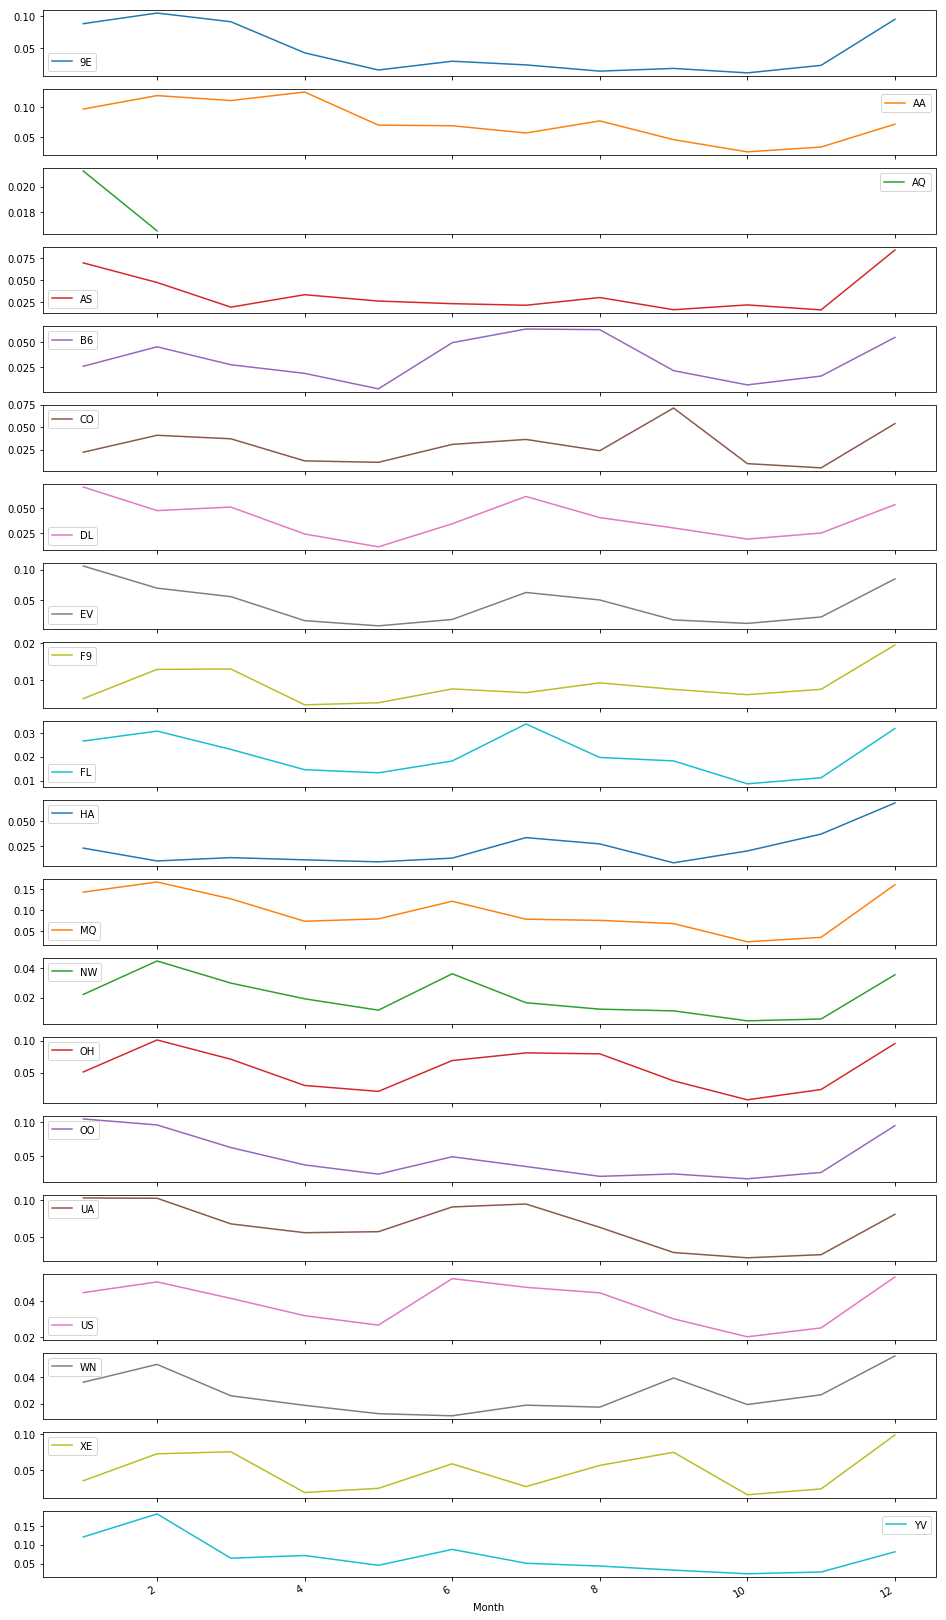

In [183]:
# Cancellations by carrier and month.
grouped_carrier = df.groupby(by=['UniqueCarrier', 'Month'])
proportional_cancellations = grouped_carrier['Cancelled'].sum() / grouped_carrier.size()
proportional_cancellations.unstack(0).plot(subplots=True, figsize=(16, 32))

In [201]:
grouped_carrier_g = df.groupby(by=['UniqueCarrier'])
proportional_cancellations_g = grouped_carrier_g['Cancelled'].sum() / grouped_carrier_g.size()
proportional_cancellations_g

UniqueCarrier
9E    0.047517
AA    0.077419
AQ    0.018930
AS    0.034509
B6    0.033992
CO    0.029433
DL    0.040082
EV    0.044458
F9    0.008415
FL    0.021146
HA    0.023446
MQ    0.098927
NW    0.021091
OH    0.056807
OO    0.049999
UA    0.067956
US    0.039248
WN    0.027653
XE    0.048069
YV    0.071780
dtype: float64

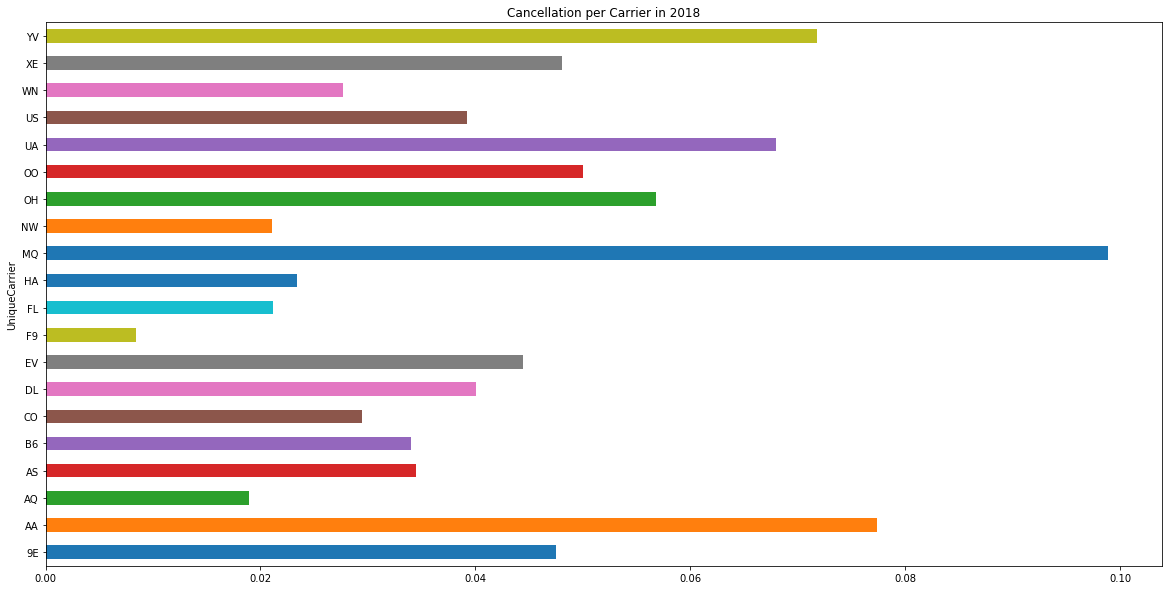

In [205]:
# visualization of cancellation rate per Carrier 
proportional_cancellations_g.plot(kind='barh', stacked=False, figsize=[20,10],title ="Cancellation per Carrier in 2008")

I need to find a way to display the carrier full name, for the moment it does not work with description.
